In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Create High Quality Visual Assets with Imagen and Gemini

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fuse-cases%2Fcreating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| | |
|-|-|
|Author(s) | [Thu Ya Kyaw](https://github.com/iamthuya) |

## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) lets developers quickly generate high-quality images from simple text descriptions. Build and edit innovative AI-powered imagery with ease.

### Objectives

In this notebook, you will create high quality visual assets for a restaurant menu using Imagen and Gemini. You will:

- Generate an image prompt with Gemini
- Use Imagen to create high quality images using prompts
- Implement a short pipeline to produce highly-detailed visual assets

## Get started

### Install Google Gen AI SDK for Python

In [2]:
%pip install --upgrade --quiet google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.2 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [8]:
import os

PROJECT_ID = "ab-eccoe-home"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

## Image Generation

### Load the image generation model

The model names from Vertex AI Imagen have two components:
* Model name
* Version number

For example, `imagen-3.0-generate-002` represents the **002** version of the **imagen-3.0-generate** model.

`imagen-3.0-generate-002` is also known as [Imagen 3](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In [9]:
imagen_model = "imagen-3.0-generate-002"

### Generate your first image

The `generate_image` function is used to generate images. All you need to input is a simple text prompt.

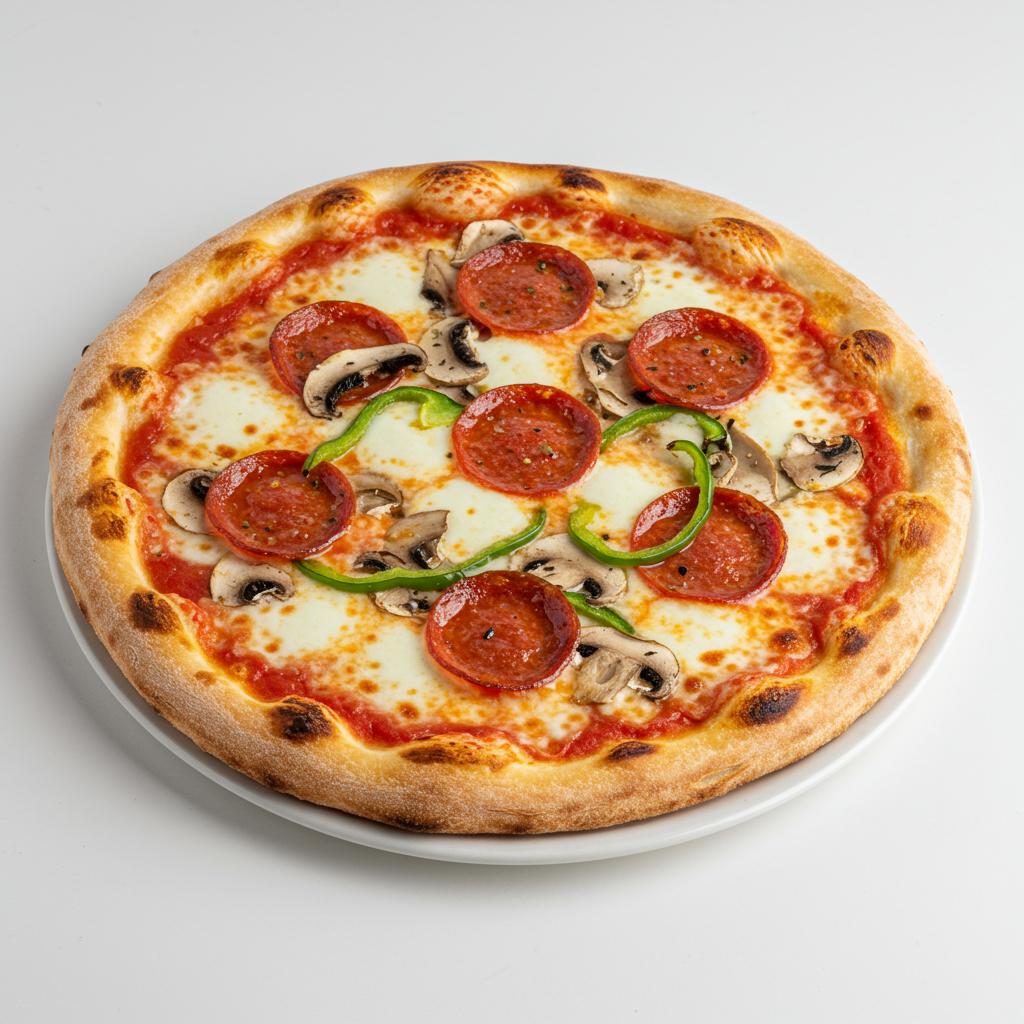

In [10]:
image_prompt = "A delicious pizza"
response = client.models.generate_images(
    model=imagen_model,
    prompt=image_prompt,
)

response.generated_images[0].image.show()

### Generating more than one image

You can currently generate up to **4** images at a time with Imagen. Imagen provides several variations based on your prompt.

You will do that in the cell below. An auxiliary function to display images in grid is also provided.

In [11]:
import math

import matplotlib.pyplot as plt


# An auxiliary function to display images in grid
def display_images_in_grid(images):
    nrows = math.ceil(len(images) / 4)  # Display at most 4 images per row
    ncols = min(len(images) + 1, 4)  # Adjust columns based on the number of images

    # Create a figure and axes for the grid layout.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].image._pil_image)
            ax.set_aspect("equal")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

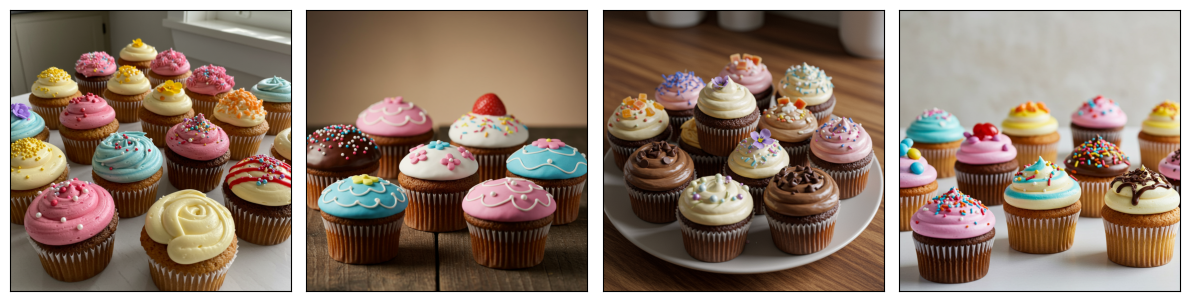

In [12]:
image_prompt = "delicious cupcakes"
response = client.models.generate_images(
    model=imagen_model,
    prompt=image_prompt,
    config=types.GenerateImagesConfig(
        number_of_images=4,
    ),
)

display_images_in_grid(response.generated_images)

### Load the Gemini model

In [13]:
gemini_model = "gemini-2.0-flash-001"

### Use Gemini to generate text content

The `generate_content` function can be used to generate content with Gemini 2.0 Flash model. You just need to provide a simple textual prompt.

In [14]:
from IPython.display import Markdown, display

# Provide text prompt and invoke generate_content
text_prompt = "What are the steps to open a restaurant?"

response = client.models.generate_content(
    model=gemini_model,
    contents=text_prompt,
)

display(Markdown(response.text))

Opening a restaurant is a complex process that requires careful planning, execution, and ongoing management. Here's a breakdown of the key steps:

**I. Planning & Research (The Foundation)**

1.  **Develop a Concept & Define Your Brand:**
    *   **Target Audience:** Who are you trying to attract? (e.g., families, young professionals, foodies)
    *   **Cuisine:** What type of food will you serve? Be specific. (e.g., Italian, Mexican, farm-to-table, vegan)
    *   **Ambiance & Style:** What kind of atmosphere do you want to create? (e.g., casual, fine dining, trendy, cozy)
    *   **Competitive Analysis:** Research existing restaurants in your target area. What are they doing well? Where are the gaps you can fill? What are their price points?
    *   **Unique Selling Proposition (USP):** What makes your restaurant different and better?

2.  **Create a Detailed Business Plan:**  This is *crucial* for securing funding and guiding your operations. It should include:
    *   **Executive Summary:** A brief overview of your restaurant concept.
    *   **Company Description:** Detailed information about your restaurant, including its mission, vision, and values.
    *   **Market Analysis:** Thorough research on your target market, competition, and industry trends.
    *   **Menu & Pricing:** A sample menu with cost analysis and pricing strategies.
    *   **Operations Plan:** Details on day-to-day operations, staffing, sourcing, and equipment.
    *   **Marketing & Sales Strategy:** How will you attract and retain customers?
    *   **Management Team:** Information about your team's experience and roles.
    *   **Financial Projections:**  This is the most critical section. Include:
        *   Start-up costs (equipment, permits, deposits, renovations)
        *   Operating expenses (rent, utilities, labor, food costs)
        *   Revenue projections (based on estimated customer traffic and average order value)
        *   Profit and loss statements
        *   Cash flow statements
        *   Break-even analysis

3.  **Secure Funding:**  Restaurants are notoriously expensive to start.
    *   **Personal Savings:**  How much can you contribute personally?
    *   **Loans:**  Small business loans (SBA loans), bank loans, lines of credit.
    *   **Investors:**  Angel investors, venture capitalists, friends and family.
    *   **Crowdfunding:**  Online platforms like Kickstarter or GoFundMe.
    *   **Grants:** Research potential grants for small businesses.
    *   **Equipment Leasing:**  Lease equipment instead of buying it outright to conserve capital.

**II. Location, Legal, & Logistics**

4.  **Find the Right Location:** This can make or break your business.
    *   **Demographics:**  Does the area have your target audience?
    *   **Foot Traffic:**  Is there enough visibility and pedestrian activity?
    *   **Accessibility:**  Is it easy to reach by car and public transportation? Parking availability is crucial.
    *   **Competition:**  How many similar restaurants are nearby?
    *   **Rent & Lease Terms:**  Negotiate favorable lease terms.
    *   **Zoning Regulations:**  Ensure the location is zoned for restaurant use.
    *   **Size & Layout:**  Does the space meet your needs for kitchen, dining area, storage, and restrooms?
    *   **Condition:**  How much renovation will be required?

5.  **Legal Structure & Registration:**
    *   **Choose a Business Structure:**  Sole proprietorship, partnership, LLC, corporation.  Consult with a lawyer and accountant to determine the best structure for your needs.
    *   **Register Your Business Name:**  Check availability and register with your state.
    *   **Obtain an Employer Identification Number (EIN):**  From the IRS, if you plan to hire employees.

6.  **Permits and Licenses:**  This is a complicated but essential step. Requirements vary by location.  Expect to need:
    *   **Business License:**  From your city or county.
    *   **Food Service License/Permit:**  Demonstrates compliance with food safety regulations.
    *   **Liquor License (if applicable):**  A lengthy and often expensive process.
    *   **Health Permits:**  Ensures your kitchen and operations meet health standards.
    *   **Building Permits:**  For any renovations or construction.
    *   **Signage Permits:**  For exterior signage.
    *   **Resale Permit:**  To collect sales tax.
    *   **Fire Safety Permits:**  Ensures compliance with fire codes.
    *   **Occupancy Permit:**  Verifies the building is safe for occupancy.

7.  **Design & Layout:**
    *   **Kitchen Design:**  Optimize for efficiency and food safety.  Consider workflow, equipment placement, and ventilation.
    *   **Dining Room Design:**  Create a welcoming and comfortable atmosphere that aligns with your brand.
    *   **ADA Compliance:**  Ensure your restaurant is accessible to people with disabilities.
    *   **Consult with Professionals:**  Consider hiring an architect, interior designer, and kitchen consultant.

**III. Implementation & Operations**

8.  **Build-Out & Renovations:**
    *   **Hire Contractors:**  Get multiple bids and check references.
    *   **Manage the Project:**  Stay on top of the schedule and budget.
    *   **Inspections:**  Schedule inspections to ensure compliance with building codes.

9.  **Purchase Equipment & Supplies:**
    *   **Kitchen Equipment:**  Ovens, stoves, refrigerators, freezers, dishwashers, etc.
    *   **Dining Room Furniture:**  Tables, chairs, booths, bar stools.
    *   **Point of Sale (POS) System:**  For order taking, payment processing, and inventory management.
    *   **Tableware & Linens:**  Plates, cutlery, glassware, napkins, tablecloths.
    *   **Cleaning Supplies:**  Essential for maintaining hygiene.
    *   **Food Supplies:**  Source ingredients from reliable suppliers.

10. **Develop Your Menu:**
    *   **Finalize Your Menu Items:**  Based on your concept and market research.
    *   **Recipe Standardization:**  Document all recipes to ensure consistency.
    *   **Costing & Pricing:**  Calculate the cost of each dish and set prices that are profitable and competitive.
    *   **Menu Design:**  Create an attractive and easy-to-read menu.
    *   **Consider Seasonal Menus:** Offer variety and utilize fresh ingredients.

11. **Hire & Train Staff:**  Your staff is the face of your restaurant.
    *   **Develop Job Descriptions:**  Clearly outline the responsibilities of each position.
    *   **Recruit and Interview Candidates:**  Use online job boards, local culinary schools, and referrals.
    *   **Background Checks:**  Conduct thorough background checks.
    *   **Training Program:**  Provide comprehensive training on food preparation, customer service, POS system, and safety procedures.

12. **Set Up Your POS System:**
    *   **Choose a POS System:**  Consider features like order management, inventory tracking, and reporting.
    *   **Configure the System:**  Input your menu items, prices, and staff information.
    *   **Train Your Staff:**  Ensure everyone knows how to use the POS system efficiently.

13. **Establish Vendor Relationships:**
    *   **Source Reliable Suppliers:**  For food, beverages, and other supplies.
    *   **Negotiate Prices:**  Get the best possible prices without sacrificing quality.
    *   **Establish Payment Terms:**  Agree on payment schedules with your suppliers.

14. **Develop Marketing & Promotion Strategies:**
    *   **Website & Social Media:**  Create an online presence to showcase your restaurant.
    *   **Grand Opening Promotion:**  Attract customers with special offers and events.
    *   **Local Partnerships:**  Collaborate with other businesses in your community.
    *   **Public Relations:**  Reach out to local media to get coverage.
    *   **Online Reviews:**  Encourage customers to leave reviews on Yelp, Google, and other platforms.
    *   **Loyalty Programs:**  Reward repeat customers.
    *   **Email Marketing:**  Build an email list to communicate with customers.

15. **Soft Opening:**
    *   **Invite Friends & Family:**  To test your menu and service.
    *   **Gather Feedback:**  Make adjustments based on the feedback you receive.

**IV. Opening & Ongoing Management**

16. **Grand Opening:**  Celebrate your launch with a special event.

17. **Monitor Performance:**
    *   **Track Sales:**  Analyze sales data to identify trends.
    *   **Monitor Food Costs:**  Keep track of ingredient prices and waste.
    *   **Analyze Customer Feedback:**  Pay attention to online reviews and customer comments.
    *   **Adjust Your Operations:**  Make changes as needed to improve efficiency and profitability.

18. **Continuous Improvement:**
    *   **Stay Up-to-Date:**  Follow industry trends and adapt to changing customer preferences.
    *   **Train Your Staff Regularly:**  Provide ongoing training to improve skills and knowledge.
    *   **Seek Feedback:**  Continuously solicit feedback from customers and staff.
    *   **Innovate:**  Introduce new menu items, promotions, and events to keep your restaurant fresh and exciting.

**Key Considerations for Success:**

*   **Passion & Dedication:** Running a restaurant is hard work.
*   **Strong Management Team:**  Surround yourself with experienced and reliable people.
*   **Excellent Customer Service:**  Make every customer feel welcome and valued.
*   **Consistent Quality:**  Maintain high standards for food and service.
*   **Financial Discipline:**  Manage your finances carefully.
*   **Adaptability:**  Be prepared to adapt to changing market conditions.
*   **Marketing is Key:**  Consistently find ways to attract new customers.

This is a general outline. Each step has its own intricacies and can vary depending on your specific situation and location. Consulting with experienced professionals like restaurant consultants, lawyers, and accountants is highly recommended throughout the process. Good luck!


To improve the user experience and reproducibility, you will define a generation config and create a function to bootstrap content generation with Gemini 2.0 Flash.

In [15]:
# Provide text prompt and invoke generate_content
def generate_content(prompt):
    # Define generation config to improve reproducibility
    generation_config = types.GenerateContentConfig(
        temperature=0.5,
        top_p=0.8,
        top_k=10,
        candidate_count=1,
        max_output_tokens=1024,
    )

    responses = client.models.generate_content(
        model=gemini_model,
        contents=text_prompt,
        config=generation_config,
    )

    return responses.text

In [16]:
text_prompt = "What are the steps to open a restaurant?"
response = generate_content(text_prompt)

display(Markdown(response))

Opening a restaurant is a complex and challenging endeavor, but with careful planning and execution, it can be a rewarding experience. Here's a breakdown of the steps involved:

**I. Planning & Research (The Foundation)**

1.  **Develop a Concept:**
    *   **Define your niche:** What type of cuisine? Target audience? What makes your restaurant unique? (e.g., farm-to-table Italian, upscale vegan, family-friendly Mexican)
    *   **Create a menu:**  Consider food costs, preparation time, and customer appeal.  Test recipes and refine them.
    *   **Establish your brand:**  Name, logo, color scheme, overall aesthetic.  This should reflect your concept.
    *   **Determine your pricing strategy:**  Consider food costs, labor costs, overhead, and competitor pricing.  Aim for profitability while remaining competitive.

2.  **Conduct Market Research:**
    *   **Identify your target market:** Who are you trying to attract?  What are their dining habits and preferences?
    *   **Analyze the competition:**  What restaurants are already in the area?  What are their strengths and weaknesses?  How can you differentiate yourself?
    *   **Assess the local demographics:**  Population density, income levels, age groups, and cultural diversity.
    *   **Evaluate the location:**  Foot traffic, visibility, accessibility, parking, proximity to competitors, and local zoning regulations.

3.  **Write a Business Plan:**  This is crucial for securing funding and guiding your operations.  It should include:
    *   **Executive Summary:**  A brief overview of your restaurant concept and goals.
    *   **Company Description:**  Detailed information about your restaurant, including its mission, vision, and values.
    *   **Market Analysis:**  Your research findings on the target market, competition, and local demographics.
    *   **Organization and Management:**  Details about your management team, organizational structure, and staffing plan.
    *   **Service or Product Line:**  A detailed description of your menu and service style.
    *   **Marketing and Sales Strategy:**  How you plan to attract and retain customers.
    *   **Funding Request (if applicable):**  The amount of funding you need and how you plan to use it.
    *   **Financial Projections:**  Projected income statements, balance sheets, and cash flow statements.  Include realistic assumptions.
    *   **Appendix:**  Supporting documents, such as resumes of key personnel, permits, and licenses.

**II. Funding & Legalities**

4.  **Secure Funding:**
    *   **Personal savings:**  A good starting point, but often insufficient.
    *   **Loans:**  Small business loans from banks or credit unions.  Requires a solid business plan and good credit.
    *   **Investors:**  Angel investors or venture capitalists.  Requires a compelling pitch and a willingness to share ownership.
    *   **Crowdfunding:**  Platforms like Kickstarter or Indiegogo.  Can be a good way to raise smaller amounts of capital and build community support.
    *   **Grants:**  Government or private grants.  Often require specific criteria and a lengthy application process.

5.  **Choose a Legal Structure:**
    *   **Sole Proprietorship:**  Simple to set up, but you are personally liable for all business debts.
    *   **Partnership:**  Two or more people share ownership and liability.
    *   **Limited Liability Company (LLC):**  Protects your personal assets from business debts.
    *   **Corporation:**  A more complex structure that offers the greatest protection from liability, but also requires more paperwork and compliance.  Consult with an attorney to determine the best structure for your situation.

6.  **Obtain Licenses and Permits:**
    *   **Business License:**  Required by most cities and counties.
    *   **Food Service License/Permit:**  Ensures compliance with health and safety regulations.
    *   **Liquor License (if applicable):**  Allows you to sell alcoholic beverages.  Can be difficult and expensive to obtain.
    *   **Health Permit:**  Ensures your kitchen and dining area meet health and safety standards.
    *   **Building Permit:**  Required for any construction or renovation work.
    *   **Sign Permit:**  For your restaurant's signage.
    *   **Employer Identification Number (EIN):**  Required if you plan to hire employees.
    *   **Sales Tax Permit:**  Allows you to collect sales tax from customers.
    *   **Music License (if applicable):**  For playing music in your restaurant.
    *   **Zoning Compliance:**  Ensure your location is zoned for restaurant use.

7.  **Insurance

### Generate a restaurant menu with Gemini 2.0 Flash


In [17]:
text_prompt = (
    "Provide a menu for an Italian restaurant. Give each menu item a brief description."
)
response = generate_content(text_prompt)

display(Markdown(response))

## Bella Italia Ristorante - A Taste of Italy

**Antipasti (Appetizers)**

*   **Bruschetta al Pomodoro (V) - $12:** Toasted Italian bread topped with fresh diced tomatoes, garlic, basil, and a drizzle of balsamic glaze. (V = Vegetarian)
*   **Calamari Fritti - $16:** Lightly battered and fried calamari, served with a spicy marinara dipping sauce.
*   **Arancini di Riso (V) - $14:** Crispy fried risotto balls filled with mozzarella cheese and a hint of saffron, served with a creamy pesto aioli.
*   **Antipasto Misto (Serves 2) - $25:** A selection of cured meats, cheeses, marinated vegetables, and olives, perfect for sharing.
*   **Carpaccio di Manzo - $18:** Thinly sliced raw beef tenderloin, topped with arugula, shaved Parmesan cheese, and a lemon vinaigrette.

**Zuppe & Insalate (Soups & Salads)**

*   **Minestrone (V, GF) - $10:** A hearty Italian vegetable soup with pasta and beans. (GF = Gluten-Free)
*   **Zuppa di Pomodoro (V, GF) - $9:** Creamy tomato soup with a touch of basil.
*   **Insalata Caprese (V, GF) - $13:** Fresh mozzarella, ripe tomatoes, and basil leaves drizzled with olive oil and balsamic glaze.
*   **Insalata Caesar - $14:** Romaine lettuce, croutons, Parmesan cheese, and classic Caesar dressing. Add grilled chicken or shrimp for $6.

**Pasta (Pasta Dishes)**

*   **Spaghetti alla Carbonara - $20:** Spaghetti tossed in a creamy sauce of eggs, pancetta, Parmesan cheese, and black pepper.
*   **Lasagna Bolognese - $22:** Layers of pasta, meat sauce, ricotta cheese, and mozzarella, baked to perfection.
*   **Penne alla Vodka (V) - $18:** Penne pasta in a creamy tomato sauce with a touch of vodka, finished with Parmesan cheese.
*   **Linguine alle Vongole - $24:** Linguine pasta with fresh clams, garlic, white wine, and parsley.
*   **Ravioli ai Funghi (V) - $21:** Homemade ravioli filled with a blend of mushrooms, served in a creamy truffle sauce.
*   **Gnocchi al Pesto (V) - $19:** Potato gnocchi tossed in a vibrant basil pesto sauce, topped with pine nuts and Parmesan cheese.

**Secondi (Main Courses)**

*   **Pollo alla Parmigiana - $26:** Breaded chicken breast topped with marinara sauce and mozzarella cheese, served with a side of spaghetti.
*   **Salmone al Limone (GF) - $28:** Pan-seared salmon fillet with a lemon-butter sauce, served with roasted vegetables.
*   **Osso Buco alla Milanese (GF) - $35:** Braised veal shanks in a rich vegetable and wine sauce, served with saffron risotto.
*   **Bistecca alla Fiorentina (GF) - $45:** Grilled T-bone steak seasoned with salt and pepper, served with roasted potatoes and rosemary.
*   **Melanzane alla Parmigiana (V) - $24:** Layers of fried eggplant, marinara sauce, mozzarella cheese, and Parmesan cheese, baked until bubbly.

**Contorni (Side Dishes)**

*   **Roasted Potatoes (V, GF) - $8:** Roasted potatoes with garlic and rosemary.
*   **Sautéed Spinach (V, GF) - $7:** Sautéed spinach with garlic and olive oil.
*   **Asparagus with Parmesan (V, GF) - $9:** Steamed asparagus topped with shaved Parmesan cheese.

**Dolci (Desserts)**

*   **Tiramisu - $12:** Classic Italian dessert with ladyfingers dipped in coffee, layered with mascarpone cheese and cocoa powder.
*   **Panna Cotta (GF) - $10:** Creamy vanilla custard served with a berry compote.
*   **Cannoli - $11:** Crispy pastry shells filled with sweet ricotta cheese and chocolate chips.
*   **Gelato (V, GF) - $8:** Choice of vanilla, chocolate, strawberry, or pistachio gelato.
*   **Affogato (V, GF) - $9:** Vanilla gelato "drowned" in a shot of hot espresso.

**Bevande (Beverages)**

*   **Espresso - $4**
*   **Cappuccino - $5**
*   **

### Improve an existing image prompt with Gemini 2.0 Flash

Here you'll use the image prompt technique of including a **style**, a **subject**, and a **context / background**.

PROMPT: 
  Rewrite "A delicious pizza" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  The final rewritten prompt should be a single sentence.

RESPONSE: 
  A professional photo of a delicious pizza on a marble counter top with studio lighting.



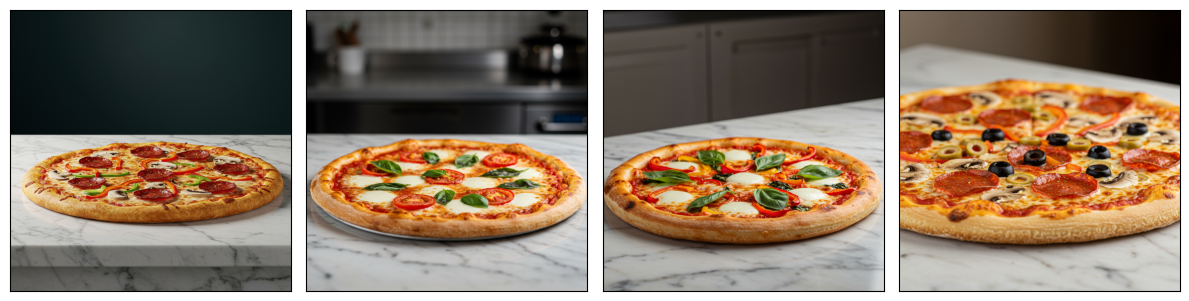

In [18]:
image_prompt = "A delicious pizza"

prompt_template = """
  Rewrite "{image_prompt}" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  The final rewritten prompt should be a single sentence.
"""

text_prompt = prompt_template.format(image_prompt=image_prompt)
rewritten_image_prompt = generate_content(text_prompt)

print(f"PROMPT: {text_prompt}")
print(f"RESPONSE: \n  {rewritten_image_prompt}")


response = client.models.generate_images(
    model=imagen_model,
    prompt=rewritten_image_prompt,
    config=types.GenerateImagesConfig(
        number_of_images=4,
    ),
)

display_images_in_grid(response.generated_images)

## Visual asset pipeline

Now that you have seen Gemini 2.0 Flash's capabilities to create a complete restaurant menu and how it can enhance the quality of image prompts, the next step is to establish a formal asset pipeline that leverages these abilities.

### Standardize the output as JSON format

In the previous attempts, Gemini 2.0 Flash returned either in Markdown or plaintext responses, which made it difficult to integrate with further steps.

To solve this, we'll ask that Gemini standardize the response in JSON format. This will make the response easier to process and integrate downstream.

In [24]:
def generate_json(text_prompt):
    # Define generation config to improve reproducibility
    generation_config = types.GenerateContentConfig(
        temperature=0.5,
        top_p=0.8,
        top_k=10,
        candidate_count=1,
        max_output_tokens=1024,
        response_mime_type='application/json'
    )

    responses = client.models.generate_content(
        model=gemini_model,
        contents=text_prompt,
        config=generation_config,
    )

    return responses.text

text_prompt = """
  Provide a menu for an Italian restaurant in a JSON format.
  Each item in the menu should have a name and a description.
  The item description should contain the ingredients and how the item was prepared.
  Don't include "of the day" items such as "soup of the day".

  The parent fields should be starters, main courses, desserts, and drinks.
  Parent fields should be lower cased.
  The child fields should be name and description.
  """
response = generate_json(text_prompt)
print(response)

{
  "starters": [
    {
      "name": "Bruschetta",
      "description": "Toasted Italian bread topped with fresh diced tomatoes, basil, garlic, and a drizzle of extra virgin olive oil."
    },
    {
      "name": "Caprese Salad",
      "description": "Fresh mozzarella, ripe tomatoes, and basil leaves, drizzled with balsamic glaze and olive oil."
    },
    {
      "name": "Arancini",
      "description": "Crispy fried risotto balls filled with mozzarella cheese and a touch of marinara sauce."
    }
  ],
  "main courses": [
    {
      "name": "Spaghetti Carbonara",
      "description": "Spaghetti tossed in a creamy sauce made with eggs, pancetta, Parmesan cheese, and black pepper."
    },
    {
      "name": "Lasagna Bolognese",
      "description": "Layers of pasta, rich meat sauce, creamy béchamel, and Parmesan cheese, baked to perfection."
    },
    {
      "name": "Chicken Parmesan",
      "description": "Breaded chicken breast topped with marinara sauce and melted mozzarella che

In [27]:
import json

# Load the responses into a JSON format
json_response = json.loads(response)
json_response["main courses"]

[{'name': 'Spaghetti Carbonara',
  'description': 'Spaghetti tossed in a creamy sauce made with eggs, pancetta, Parmesan cheese, and black pepper.'},
 {'name': 'Lasagna Bolognese',
  'description': 'Layers of pasta, rich meat sauce, creamy béchamel, and Parmesan cheese, baked to perfection.'},
 {'name': 'Chicken Parmesan',
  'description': 'Breaded chicken breast topped with marinara sauce and melted mozzarella cheese, served with a side of spaghetti.'},
 {'name': 'Mushroom Risotto',
  'description': 'Creamy risotto cooked with a variety of wild mushrooms, Parmesan cheese, and a touch of truffle oil.'}]

### Generating visual asset programmatically

Using the newly formatted menu, you will be creating a batch of images programatically using Imagen 3. You will use the Gemini 2.0 Flash model to rewrite each description into a detailed image prompt.

In [28]:
# convert a description into an image prompt
description = json_response["main courses"][0]["description"]
text_prompt = prompt_template.format(image_prompt=description)
image_prompt = generate_content(text_prompt)

print(f"DESCRIPTION:\n  {description}\n")
print(f"IMAGE PROMPT:\n  {image_prompt}\n")

DESCRIPTION:
  Spaghetti tossed in a creamy sauce made with eggs, pancetta, Parmesan cheese, and black pepper.

IMAGE PROMPT:
  A professional photo of spaghetti carbonara, featuring creamy egg sauce, crispy pancetta, Parmesan cheese, and cracked black pepper, served in a white bowl on a marble countertop with studio lighting.




Here you will generate **starters** from the menu

ORIGINAL: Spaghetti tossed in a creamy sauce made with eggs, pancetta, Parmesan cheese, and black pepper.
IMPROVED: A studio photo of spaghetti tossed in a creamy sauce with pancetta, Parmesan cheese, and black pepper, presented on a white plate on a marble countertop with studio lighting.



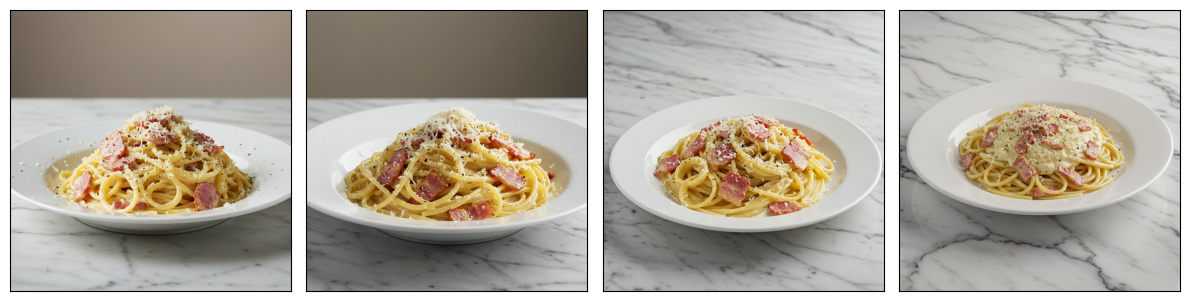


ORIGINAL: Layers of pasta, rich meat sauce, creamy béchamel, and Parmesan cheese, baked to perfection.
IMPROVED: A professional photo of a perfectly baked lasagna, showcasing visible layers of pasta, rich meat sauce, creamy béchamel, and Parmesan cheese, on a marble countertop with studio lighting.



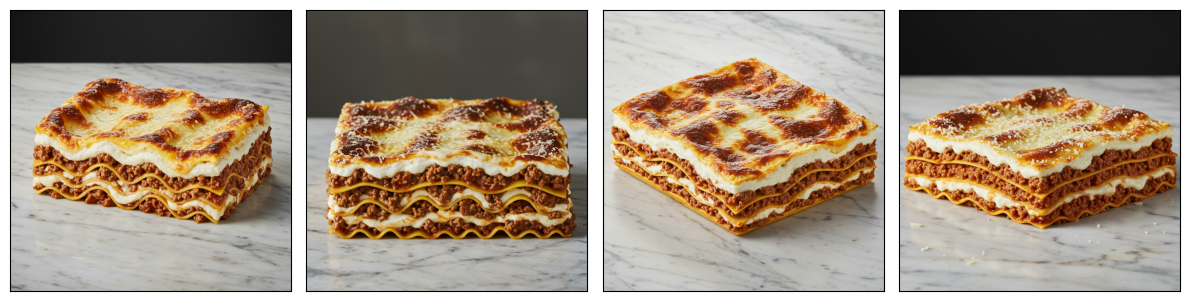


ORIGINAL: Breaded chicken breast topped with marinara sauce and melted mozzarella cheese, served with a side of spaghetti.
IMPROVED: A professional photo of chicken parmesan with melted mozzarella and marinara, served with spaghetti, on a marble countertop with studio lighting.



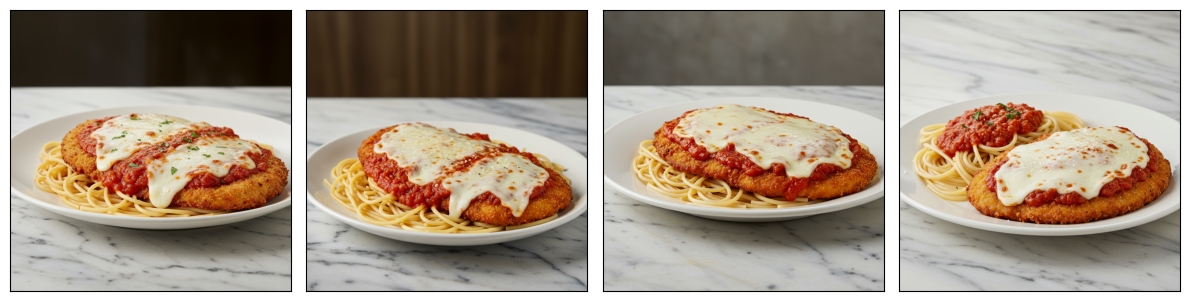


ORIGINAL: Creamy risotto cooked with a variety of wild mushrooms, Parmesan cheese, and a touch of truffle oil.
IMPROVED: A professional photo of creamy risotto with wild mushrooms, Parmesan, and truffle oil, served in an Italian restaurant with soft lighting.



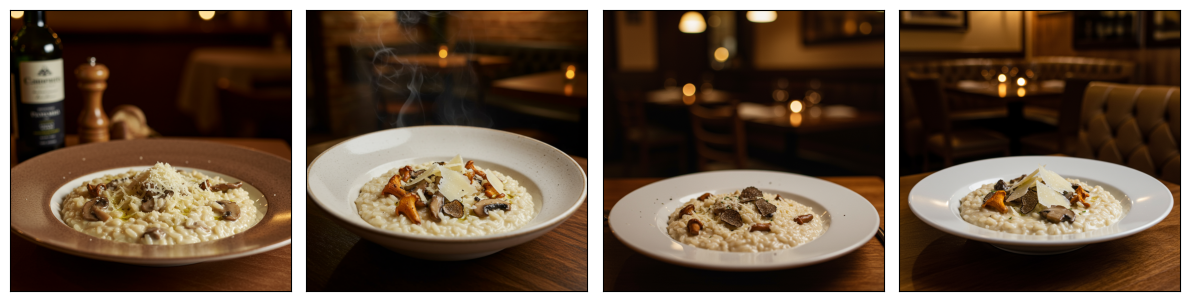

In [29]:
for starter in json_response["main courses"]:
    text_prompt = prompt_template.format(image_prompt=starter["description"])
    image_prompt = generate_content(text_prompt)

    print(f"ORIGINAL: {starter['description']}")
    print(f"IMPROVED: {image_prompt}")

    response = client.models.generate_images(
        model=imagen_model,
        prompt=image_prompt,
        config=types.GenerateImagesConfig(
            number_of_images=4,
        ),
    )

    display_images_in_grid(response.generated_images)
    print()

## Conclusion

Congratulations! You have successfully created a professional restaurant menu with the help of Gemini and Imagen!

Imagen on Vertex AI can do much more that generating realistic images. Imagen allows you to edit images, generate captions, ask questions of images, and more. Explore all the features of Imagen [here](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview).